In [64]:
import gzip
from contextlib import closing
from xml.etree import ElementTree as etree
from bs4 import BeautifulSoup
import os
from contextlib import closing
from xml.etree import ElementTree as etree
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cPickle as Pickle
import io
from decimal import Decimal

In [93]:
news_dataset = "/datasets/dk/news-short"

keywords = ["farmers","draught","water scarcity","drought","hosepipe ban","water scarcity","water conservation",
            "water crisis" , "water resilience" , "water reuse" , "shower ban", "water use","water consumption"
            "water saving" , "shower" ,"shower less", "less water", "bathing less","irrigation" , "crop yield" ,
            "dry shampoo", "grey water", "bathing wipes" ,"farmer issues" , "lower yield","crops" ,"hot summer",
            "scorching" , "heat wave", "water cuts" , "watercuts" , "water shortage" , "dry summer", "hot weather", 
            "picnic weather", "beach weather","blocking", "blocking anticyclone", "anticyclone" , "el nino",
            "El Nino", "La Nina"]
total = 0
news2013 = "/datasets/sagarj/water_scarcity/waterNewsDataMatched_2013.pkl"
news2015_1 = "/datasets/sagarj/water_scarcity/waterNewsDataMatched_2015_1.pkl"
currentDir =  os.getcwd();
logPickle = currentDir + "/curationLogChunk.pk"

In [66]:
tokenized_vine_sentences
f1 = open(news2013, 'rb')
data2013 = Pickle.load(f1)

f2 = open(news2015_1, 'rb')
data2015 = Pickle.load(f2)

In [67]:
print len(data2013)
print len(data2015)

63904
18986


In [68]:
keywordHistogram = np.zeros(len(keywords))
print keywordHistogram.shape
for i in range(len(data2013)):
    for j in range(len(keywords)):
        if keywords[j] in data2013[i]['matched']:
            keywordHistogram[j] += 1

print keywordHistogram


(41,)
[  1.55090000e+04   2.72000000e+02   1.59000000e+02   1.03640000e+04
   1.00000000e+00   1.59000000e+02   4.37000000e+02   2.26000000e+02
   0.00000000e+00   3.80000000e+01   0.00000000e+00   1.10500000e+03
   0.00000000e+00   1.29520000e+04   1.00000000e+00   4.88000000e+02
   0.00000000e+00   2.14700000e+03   4.10000000e+02   6.50000000e+01
   3.10000000e+01   0.00000000e+00   5.00000000e+00   1.62000000e+02
   7.43100000e+03   6.53000000e+02   1.12600000e+03   1.23300000e+03
   3.00000000e+01   0.00000000e+00   4.12000000e+02   1.70000000e+02
   6.49000000e+02   1.00000000e+00   2.20000000e+01   1.54200000e+04
   1.00000000e+00   7.80000000e+01   3.00000000e+00   3.24000000e+02
   1.55000000e+02]


(array([ 6.,  4.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 40 Patch objects>)

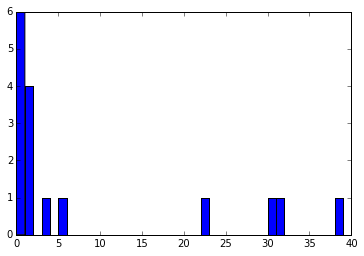

In [69]:
plt.get_current_fig_manager().resize(200, 100)
plt.hist(keywordHistogram, bins = np.arange(0,41,1))

In [70]:
multiMatched2013 = []

for i in range(len(data2013)):
    if len(data2013[i]['matched']) > 1:
        multiMatched2013.append(data2013[i])

print len(multiMatched2013)

multiMatched2015 = []

for i in range(len(data2015)):
    if len(data2015[i]['matched']) > 1:
        multiMatched2015.append(data2015[i])

print len(multiMatched2015)

totalMatched = multiMatched2013 + multiMatched2015

print len(totalMatched)


6486
2417
8903


In [71]:
USAarticles = []
for obj in totalMatched:
    if obj['country'] == 'USA' or obj['country'] == 'United States':
        USAarticles.append(obj)
        
UKAarticles = []
for obj in totalMatched:
    if obj['country'] == 'United Kingdom':
        UKAarticles.append(obj)

WorldArticles =[]

for obj in totalMatched:
    if (obj['country'] != 'United Kingdom' and obj['country'] != 'USA' and obj['country'] != 'United States') :
        WorldArticles.append(obj)

In [131]:
print len(USAarticles)
print len(UKAarticles)
print len(WorldArticles)

4403
486
4014


In [73]:
countries = []
for obj in WorldArticles:
    if obj['country'] not in countries:
        countries.append(obj['country'])
print countries

['', u'Australia', u'India', u'Viet Nam', u'New Zealand', u'Canada', u'Ireland', u'Sierra Leone', u'France', u'Spain', u'Burma (Myanmar)', u'Ghana', u'Kenya', u'China', u'Colombia', u'Afghanistan', u'South Africa', u'United Arab Emirates', u'Pakistan', u'Jamaica', u'Germany', u'Belize', u'Micronesia, Federated States of', u'Italy', u'Tuvalu', u'Azerbaijan', u'Malaysia', u'Russia', u'Japan', u'Ukraine', u'Czech Republic', u'Taiwan', u'Hungary', u'Nigeria', u'Netherlands', u'Uganda', u'Korea, Republic of', u'Occupied Palestinian Territory', u'Iran, Islamic Republic of', u'Bangladesh', u'Panama', u'Taiwan, Province of China', u'Latvia', u'Armenia', u'Singapore', u'Lebanon', u'Gambia', u'Russian Federation', u'Thailand', u'Israel', u'Zimbabwe', u'Malta', u'Nepal', u'Botswana', u'Denmark', u'Philippines', u'Kyrgyzstan', u'Switzerland', u'Serbia', u'Fiji', u'Qatar', u'Bulgaria', u'Saudi Arabia', u'Swaziland', u'Indonesia', u'Uzbekistan', u'Yemen', u'Romania', u'Chile', u"Lao People's Democra

In [74]:
californiaArticles = []
californiaKeys = ['California', 'california' , 'California Drought', 'water conservation' ,'droughtshaming' ,'drought shaming']
for obj in USAarticles:
    count = 0
    for key in californiaKeys:
        if(obj['text'].find(key) > 0):
            count += 1
    if count > 0:
        californiaArticles.append(obj)

        
print len(californiaArticles) 
    

1048


In [75]:
# dmytroArticles = []
# dmytroKeys = ['droughtshaming', 'calidrought', 'wastewater', 'stopthatdrip', 'cadrought', 'savewater', 'cawater' ,'DroughtSelfie',
#              'KeepSavingCA']
# for obj in californiaArticles:
#     count = 0
    
#     for key in dmytroKeys:
#         if(obj['text'].find(key) > 0):
#             count += 1
#             obj['matched'].append(key)
#     if count > 0:
#         dmytroArticles.append(obj)

        
# print len(dmytroArticles) 
# print dmytroArticles[50]

64
{'country': u'USA', 'longitude': u'-107.810951', 'text': u'Officials from the Town of Telluride and Planet Bluegrass say the 41st annual festival went smoothly with no major problems and attendance was down slightly from last year.\nDespite the record-shattering online ticket sales in December that saw four-day passes sell out in just eight minutes, attendance was down from last year\'s festival. According to Planet Bluegrass box office numbers, 10,379 festivarians packed Town Park on Thursday, 11,416 on Friday, 11,551 on Saturday and 11,466 on Sunday. About 3 percent of people who bought tickets were no-shows over the four days. The 2013 event saw record attendance, in part, because it was the 40th anniversary of the Telluride Bluegrass Festival.\n"It was a noticeably smaller crowd than last year," Telluride Parks and Recreation Director Stephanie Jaquet said at Tuesday\'s debriefing meeting.\nThe annual four-day event saw hordes of straw-hat-wearing, tarp-toting festivarians dance

In [83]:

# f = open("Dmytro_keywords_news.pkl", 'a+')
# Pickle.dump(dmytroArticles, f, protocol=Pickle.HIGHEST_PROTOCOL)
# f.close()

In [84]:
WorldCaliforniaArticles = []
californiaKeys = ['California', 'california' , 'California Drought', 'water conservation' ,'droughtshaming' ,'drought shaming']
temp = UKAarticles + WorldArticles
for obj in temp:
    count = 0
    for key in californiaKeys:
        if(obj['text'].find(key) > 0):
            count += 1
    if count > 0:
        WorldCaliforniaArticles.append(obj)

        
print len(WorldCaliforniaArticles) 

498


In [85]:
climateArticles = []
climateKeys = ['COP21', 'climate change' , 'global warming']
for obj in californiaArticles:
    count = 0
    for key in climateKeys:
        if(obj['text'].find(key) > 0):
            count += 1
    if count > 0:
        climateArticles.append(obj)

        
print len(climateArticles) 
print (float(len(climateArticles))/ float(len(californiaArticles)))*100
    

160
15.2671755725


In [86]:
UKclimateArticles = []
for obj in UKAarticles:
    count = 0
    for key in climateKeys:
        if(obj['text'].find(key) > 0):
            count += 1
    if count > 0:
        UKclimateArticles.append(obj)

        
print len(UKclimateArticles) 
print (float(len(UKclimateArticles))/ float(len(UKAarticles)))*100

100
20.5761316872


In [87]:
WorldclimateArticles = []

for obj in WorldArticles:
    count = 0
    for key in climateKeys:
        if(obj['text'].find(key) > 0):
            count += 1
    if count > 0:
        WorldclimateArticles.append(obj)

        
print len(WorldclimateArticles) 
print (float(len(WorldclimateArticles))/ float(len(WorldArticles)))*100

781
19.456900847


In [88]:
print californiaArticles[10]

{'country': u'USA', 'longitude': u'-121.491013', 'text': u'Copyright 2013 The Sacramento Bee. All rights reserved. This material may not be published, broadcast, rewritten or redistributed.\nCalifornia officials on Thursday released a five-year "Water Action Plan" intended to avoid a statewide water supply crisis stemming from drought, population growth and climate change.\nJohn Laird, secretary of the state Natural Resources Agency, acknowledged that the plan does not include a lot of new ideas. Rather, the goal is to integrate existing ideas about water supply and conservation and get disparate state agencies working together.\nThe plan is considered a draft, and is expected to be finalized in December following public comment.\n"We have to focus on the whole picture," Laird said. "What\'s new is that it\'s never existed in one place as a priority to look at together with everything we want to do in the state."\nAs an example of that integration, the plan was unveiled jointly by Lair

In [89]:
import csv
caliFile = "california_drought_news.csv"

csvfile = open(caliFile , 'wb')
writer = csv.writer(csvfile)
fields = ['timestamp','latitude','longitude']
row = fields + keywords
writer.writerow(row)
for obj in californiaArticles:
    info = [obj['timeStamp'] , obj['latitude'] , obj['longitude']]
    sparseVec = []
    for i in range(len(keywords)):
        if keywords[i] in obj['matched']:
            sparseVec.append('1')
        else:
            sparseVec.append('0')
    row = info + sparseVec
    writer.writerow(row)
csvfile.close()    

In [90]:

worldCaliFile = "world_california_drought_news.csv"

csvfile = open(worldCaliFile , 'wb')
writer = csv.writer(csvfile)
fields = ['timestamp','latitude','longitude']
row = fields + keywords
writer.writerow(row)
for obj in WorldCaliforniaArticles:
    info = [obj['timeStamp'] , obj['latitude'] , obj['longitude']]
    sparseVec = []
    for i in range(len(keywords)):
        if keywords[i] in obj['matched']:
            sparseVec.append('1')
        else:
            sparseVec.append('0')
    row = info + sparseVec
    writer.writerow(row)

csvfile.close()    

In [91]:
print len(keywords)

41


In [94]:
nodeFile = "nodes.csv"
csvfile = open(nodeFile , 'wb')
writer = csv.writer(csvfile)
writer.writerow(keywords)

In [103]:
print californiaArticles[100]['text'].encode('utf-8')

by Viktor Bogatko - Special to the SGN
A couple of weeks ago, I received a pamphlet in the mail that caught my attention. It was from the opponents of Initiative 522, urging me to vote no on labeling GMO foods. Of course by this point I had already heard of the initiative and my decision seemed like a no-brainer. After all, what harm is there in labeling food for what it is? Wouldn't consumers be more informed and therefore more equipped in making healthy choices at the grocery store?
Although the obvious answer is that labeling GMO foods would be more helpful for consumers in making healthy and more sustainable decisions, I was intrigued that I was hearing more from opponents about the issue. Besides the typical attacks in bold print, I noticed in the bottom right corner, in the smallest of print size was a short list of the top five sponsors of the pamphlet. I was shocked to see that the largest contributors were GMO and chemical corporations, including Monsanto, ConAgra, and DuPont.

In [122]:
import nltk
from nltk.collocations import *
from nltk.tokenize import TweetTokenizer

Tokenizer = TweetTokenizer()
USACaliNewsCorpus = []
for news in californiaArticles:
    utfnews = news['text'].encode('utf-8')
    tokens = Tokenizer.tokenize(utfnews)
    for token in tokens:
        USACaliNewsCorpus.append(token)


In [123]:
# tokens = Tokenizer.tokenize(californiaArticles[1]['text'].encode('utf-8'))
# print tokens
print len(USACaliNewsCorpus)

1338740


In [128]:

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(USACaliNewsCorpus, window_size = 20)
finder.nbest(bigram_measures.pmi, 100) 

[(u'#13', u'Cow'),
 (u'#13', u"Cow's"),
 (u'#13', u'mooing'),
 (u'#20', u'bakeries'),
 (u'#ActOnClimate', u'#StateOfClimatehttp'),
 (u'#ActOnClimate', u'@whitehouseostp'),
 (u'#ActOnClimate', u'OSTP'),
 (u'#ActOnClimate', u't.co/bHyVlzZsVIpic.twitter.com/Wrpeb7w7hi'),
 (u'#StateOfClimatehttp', u'@whitehouseostp'),
 (u'#StateOfClimatehttp', u'OSTP'),
 (u'#StateOfClimatehttp', u't.co/bHyVlzZsVIpic.twitter.com/Wrpeb7w7hi'),
 (u'#WaterIs', u'#okstate'),
 (u'(707) 558-0543', u'7136'),
 (u'(707) 558-0543', u'Stonebrooke'),
 (u'(760) 241-7755', u'1-800-553-2006'),
 (u'(800-838-1766',
  u'http://www.cntraveler.com/daily-traveler/2012/08/swimming-spots-united-states-summer-getaway-photos_slideshow_White-Rock-Park_6?mbid=synd_huffpo'),
 (u'(800-838-1766', u'massages'),
 (u'+1.05', u'3.04'),
 (u'+1.05', u'4:04'),
 (u'+1.05', u'HOURS'),
 (u'+2.5', u'4.51'),
 (u'+2.5', u'lb'),
 (u'+5.0', u'-3.7'),
 (u'-0.26', u'22.47'),
 (u'-0.26', u'26,340'),
 (u'-0.26', u'5:22'),
 (u'-0.26', u'Ratio'),
 (u'-0.27'

In [126]:
Tokenizer = TweetTokenizer()
WorldCaliNewsCorpus = []
for news in WorldCaliforniaArticles:
    utfnews = news['text'].encode('utf-8')
    tokens = Tokenizer.tokenize(utfnews)
    for token in tokens:
        WorldCaliNewsCorpus.append(token)


In [129]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(WorldCaliNewsCorpus ,window_size = 20)
finder.nbest(bigram_measures.pmi, 100) 

[(u'#200', u'@gregharris'),
 (u'#25', u'twenty-fifth'),
 (u'#SustLiving', u'Gail'),
 (u'#SustLiving', u'Klintworth'),
 (u'#SustLiving', u'Unilever'),
 (u'#SustLiving', u"Unilever's"),
 (u'(206) 301-0167', u'(206) 383-2231'),
 (u'(206) 301-0167', u'MichaelG'),
 (u'(206) 383-2231', u'MichaelG'),
 (u'(206) 383-2231',
  u'http://www.prweb.com/releases/digester/California/prweb12509890.htm'),
 (u'(270)869-9419', u'518-767-9051'),
 (u'(270)869-9419', u'nancy'),
 (u'(270)869-9419', u'www.auduboninternational.org'),
 (u'(323) 469-3397', u'@edgecommunicationsinc'),
 (u'(323) 469-3397', u'ken'),
 (u'(530) 898-5356', u'@csuchico'),
 (u'(530) 898-5356', u'Dig'),
 (u'(530) 898-5356', u'Gifts'),
 (u'(530) 898-5356', u'edu'),
 (u'(530) 898-5356', u'jbraden'),
 (u'(530)893-5123', u'(530) 342-2239'),
 (u'(805) 239-4443', u'@arandcompany'),
 (u'(805) 239-4443', u'angela'),
 (u'(951) 672-2669', u'@californiacleanairtech'),
 (u'(951) 672-2669', u'michael'),
 (u'(951) 672-2669',
  u'www.propane.com/agricul

In [133]:
Tokenizer = TweetTokenizer()
UKNewsCorpus = []
for news in UKAarticles:
    utfnews = news['text'].encode('utf-8')
    tokens = Tokenizer.tokenize(utfnews)
    for token in tokens:
        UKNewsCorpus.append(token)
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(UKNewsCorpus ,window_size = 20)
finder.nbest(bigram_measures.pmi, 100) 


[(u'#HootonTrains', u'@NRE_MerseyRail'),
 (u'#HootonTrains', u'LATEST'),
 (u'#Lastalot', u'#masterblaster'),
 (u'#SustLiving', u'Klintworth'),
 (u'#SustLiving', u'Sustainability'),
 (u'#SustLiving', u'Unilever'),
 (u'#SustLiving', u"Unilever's"),
 (u"#Syria's", u'3:32'),
 (u"#Syria's", u'Cause'),
 (u"#Syria's", u'http://t.co/8s4cGT3vuc'),
 (u"#Syria's", u'iOS'),
 (u'0.16', u'0.4'),
 (u'0.31', u'eight-month'),
 (u'0.31', u'equities'),
 (u'0.44', u'0.65'),
 (u'0.44', u'87.44'),
 (u'0.44', u'87.78'),
 (u'0.45', u'80-90'),
 (u'0.45', u'backwash'),
 (u'0.45', u'micrometer'),
 (u'0.50-', u'0.80'),
 (u'0.50-', u'biryani'),
 (u'0.50-', u'rice-based'),
 (u'0.57', u'0.44'),
 (u'0.57', u'0.65'),
 (u'0.57', u'87.44'),
 (u'0.65', u'87.44'),
 (u'0.65', u'87.78'),
 (u'0.80', u'biryani'),
 (u'0.80', u'rice-based'),
 (u'0.9', u"quarter's"),
 (u'000MT', u'301MT'),
 (u'000MT', u'7,075'),
 (u'004', u'Pot'),
 (u'004', u'alpine'),
 (u'006', u'Sakiul'),
 (u'01285', u'004'),
 (u'01285', u'Pot'),
 (u'01285', u

In [ ]:
TrigramCollocationFinder.from_words